# General Description:

For CDD

Plotting choice as a function of delay_amount, subdivded by delay_wait_time and immediate_amount

Importing libraries and mounting Google Drive

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import sys
import os

Defining count_tuples() function to return the unique items and their frequencies 

In [3]:
def count_tuples(listA):
  unique_items = list(set(listA))
  item_count = [listA.count(item) for item in unique_items]
  return unique_items,item_count

In [11]:
def count_delay_wait_immed_amt(fn_helper):
  df = pd.read_csv(fn_helper)
  #0's are now choosing immediate, 1 is choosing delay
  df['cdd_trial_resp.corr'] = 1.0 - df['cdd_trial_resp.corr']
  
  #get unique smaller soon amounts that are "task" trials
  df = df.loc[df['cdd_trial_type'] == 'task']
  immed_amt_count_df = df['cdd_immed_amt'].value_counts().sort_index()
  immed_amt_count_df = immed_amt_count_df.reset_index()
  immed_amt_count_df.rename(columns={"index":"immed_amt"}, inplace=True)
  print(immed_amt_count_df)
  #create .csv file with this info
  fn = os.path.join('csv','cdd_immed_amts.csv')
  print("Saving to: {}".format(fn))
  immed_amt_count_df.to_csv(fn)

  #get unique delay-wait time amounts that feature in "task" trials
  delay_wait_count_df = df['cdd_delay_wait'].value_counts().sort_index()
  delay_wait_count_df = delay_wait_count_df.reset_index()
  delay_wait_count_df.rename(columns={"index":"delay_wait"}, inplace=True)
  print(delay_wait_count_df)
  #create .csv file with this info
  fn = os.path.join('csv',"cdd_delay_waits.csv")
  print("Saving to: {}".format(fn))
  delay_wait_count_df.to_csv(fn)

Defining get_subject() function to just get the subject file name from the filepath

In [5]:
def get_subject(data):
  subj = os.path.basename(data).replace(".csv","")
  return subj

Get sorted list of all participant data files, else notify error

In [12]:
#get set of all good data files for analysis
split_dir = '/Volumes/UCDN/datasets/IDM/split/'
good_files = sorted(glob(os.path.join(split_dir, '23_IDM_*/cdd/23_IDM*_cdd.csv')))
if (not good_files):
  print("No good files available. Check file path.")
  sys.exit()

fn_helper = os.path.join(split_dir,'23_IDM_0149/cdd/23_IDM_0149_cdd.csv')
count_delay_wait_immed_amt(fn_helper)

   cdd_immed_amt  count
0            2.0     32
1           10.0     32
2           20.0     32
Saving to: csv/cdd_immed_amts.csv
    cdd_delay_wait  count
0              4.0      6
1              5.0      7
2              6.0      3
3              9.0      5
4             10.0      5
5             11.0      5
6             29.0      5
7             30.0      5
8             31.0      6
9             59.0      5
10            60.0      6
11            61.0      4
12            64.0      1
13            89.0      7
14            90.0      8
15            91.0      2
16           149.0      3
17           150.0      7
18           151.0      5
19           152.0      1
Saving to: csv/cdd_delay_waits.csv


Use the results from above to define upper and lower bounds and ylabels and titles

Saving to: /content/drive/MyDrive/CloudResearchTrialDataApprovedFiles/CDD/idm-v2_2023-01-25_12h21.15.616/delay_amt_choice.csv
            delay_wait      immed_amt delay_amt_choice frequency
0       Delay Wait 4-6   Immediate $2       (7.0, 1.0)         1
1       Delay Wait 4-6   Immediate $2      (43.0, 1.0)         1
2       Delay Wait 4-6   Immediate $2      (13.0, 1.0)         1
3       Delay Wait 4-6   Immediate $2      (22.0, 1.0)         1
4       Delay Wait 4-6   Immediate $2      (65.0, 1.0)         1
..                 ...            ...              ...       ...
91  Delay Wait 149-152  Immediate $15      (65.0, 1.0)         1
92  Delay Wait 149-152  Immediate $15      (20.0, 1.0)         1
93  Delay Wait 149-152  Immediate $15      (24.0, 0.0)         1
94  Delay Wait 149-152  Immediate $15      (15.0, 0.0)         1
95  Delay Wait 149-152  Immediate $15      (54.0, 1.0)         1

[96 rows x 4 columns]
Saving to: /content/drive/MyDrive/CloudResearchTrialDataApprovedFiles/C

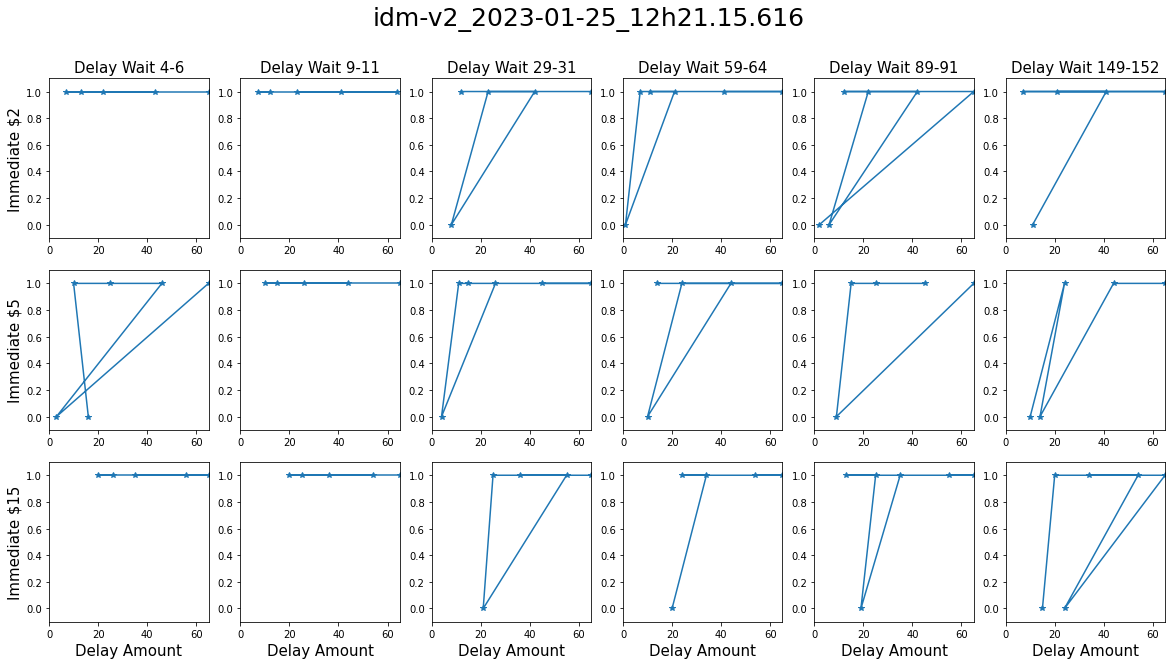

SystemExit: ignored

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [15]:
delay_lower_bound = [0,8,25,45,75,100]
delay_upper_bound = [8,25,45,75,100,155]
immed_lower_bound = [0, 3, 12]
immed_upper_bound = [3, 12, 30]
ylabels = ['Immediate $2','Immediate $5', 'Immediate $15']
titles = ['Delay Wait 4-6', 'Delay Wait 9-11','Delay Wait 29-31','Delay Wait 59-64','Delay Wait 89-91','Delay Wait 149-152']

cols = ["delay_wait", "immed_amt", "delay_amt_choice","frequency"]
delay_amt_choice_df = pd.DataFrame(columns=cols)

#
for i, data in enumerate(good_files):
  df = pd.read_csv(data)
  df['cdd_trial_resp.corr'] = 1.0 - df['cdd_trial_resp.corr']
  df = df.loc[df['cdd_trial_type'] == 'task']

  plt.figure(i,figsize=(20,10))   

  #loop through each delay-wait subgroup for each smaller sooner amount 
  for iimmed, (il,iu) in enumerate(zip(immed_lower_bound,immed_upper_bound)):
    for iplot,(lb,ub) in enumerate(zip(delay_lower_bound,delay_upper_bound)):
      index = 1+iplot+(6*iimmed)
      plt.subplot(3,6,index)
      x = []
      y = []
          
      #get dataframe with the appropriate smaller sooner and delay-wait time values
      idf = df.loc[(df['cdd_delay_wait'] < ub) & (df['cdd_delay_wait'] > lb) & (df['cdd_immed_amt'] < iu) & (df['cdd_immed_amt'] > il)]
      x = x + idf['cdd_delay_amt'].tolist()
      y = y + idf['cdd_trial_resp.corr'].tolist()
      
      #used to fill .csv file for each participant's choices
      delay_amt_choice, count = count_tuples(list(zip(x,y)))
      this_df = pd.DataFrame(columns=cols)
      this_df["frequency"] = count
      this_df["delay_amt_choice"] = delay_amt_choice
      this_df["delay_wait"] = titles[iplot]
      this_df["immed_amt"] = ylabels[iimmed]
      delay_amt_choice_df = delay_amt_choice_df.append(this_df,ignore_index=True)

      #sort by x and y in order to connect lines properly on final plots
      x,y = zip(*sorted(zip(x,y)))
      plt.plot(x,y,'*-')
      plt.ylim([-0.1,1.1])
      plt.xlim([0,df['cdd_delay_amt'].max()])
      if (iplot == 0):
        plt.ylabel(ylabels[iimmed],fontsize=15)
      if (iimmed == 0):
        plt.title(titles[iplot],fontsize=15)
      if (iimmed == 2):
        plt.xlabel("Delay Amount",fontsize=15)


  subj = get_subject(data)
  subj_dir = os.path.join(filepath,"CDD",subj)
  if (not os.path.exists(subj_dir)):
    os.makedirs(subj_dir)

  fn = join(filepath,"CDD", subj, "delay_amt_choice.csv")
  print("Saving to: {}".format(fn))
  delay_amt_choice_df.to_csv(fn)
  print(delay_amt_choice_df)
  plt.suptitle(subj, fontsize=25)
  fig_fn = join(filepath,"CDD", subj,"CDD_plot_delay_amt_choice.png")
  print("Saving to: {}".format(fig_fn))
  plt.savefig(fig_fn)
  plt.show()
  #sys.exit()